In [ ]:
# import tensorflow.compat.v1 as tf
# #Lets see if tensorflow finds the GPU
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# # import tensorflow as tf

In [ ]:
#Lets see if it works
# tf.ones(1) + tf.ones(1)

### Step 2: Import all libraries and packages

In [27]:
import numpy as np # for working with arrays and matrices
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

import os # OS module provides various operating system-related functions to the code
# import csv # CSV module is used for working with CSV (Comma Separated Values) files in Python.
import pickle

# # used for splitting data into training and testing sets in Python.
# from sklearn.model_selection import train_test_split 

# # for generating a confusion matrix
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import f1_score
# from keras.models import load_model


# # Classes and functions from the Keras library which is used for building and training deep learning models in Python.
# from keras.models import model_from_json
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dropout
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from save_model_info import save_training_info


# # These import the Adam optimizer class and various other classes from the TensorFlow Keras library 
# # which is a high-level neural networks API used for building and training deep learning models in Python.
# from tensorflow.keras.optimizers.legacy import Adam
# from tensorflow.keras import datasets, layers, models
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.callbacks import EarlyStopping


# from plots import plot_confusion_matrix, plot_accuracy, plot_loss, plot_accuracy_k_fold, plot_loss_k_fold, plot_average_accuracy_k_fold, plot_average_loss_k_fold

### Step 2: Loading variables from the experiment

In [14]:
model_just_executed = True # True if you are plotting results from a model you just ran

if model_just_executed == True:
    
    %store -r experiment_ID
    print("Printing results from experiment "+experiment_ID)
    %store -r save_dir
    print("from path: "+save_dir)

    print("Restoring variables from model execution...\nDone")
    %store -r f1_score_val_list
    %store -r f1_score_mean
    %store -r num_folds
    %store -r conf_matrices
    %store -r epochs
    %store -r output_dir
    %store -r data_file
    %store -r no_of_labels
    %store -r train_labels_names 

Printing results from experiment BPNN_V4.2
from path: /home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/BPNN_V4.2_output
Restoring variables from model execution...
Done


Plotting Confusion Matrix of BPNN_V4.2


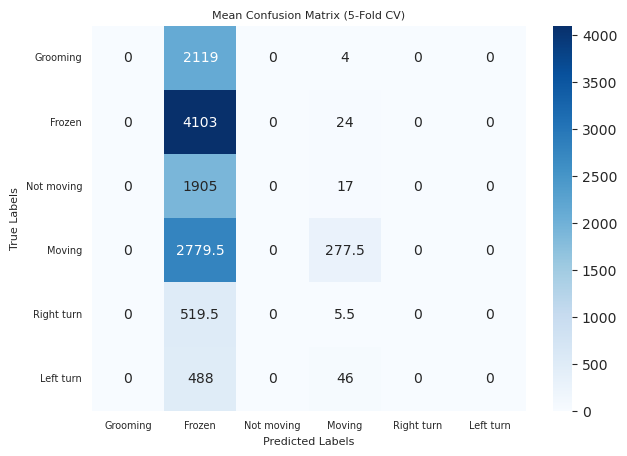

Loading pickels to make more plots...
Done
Setting paths to save results...
Done
Plotting Accuracy and Loss for BPNN_V4.2


ValueError: Data must be 1-dimensional

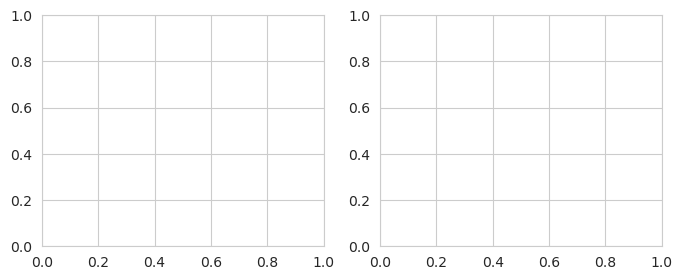

In [29]:
if model_just_executed == True:
    
    print("Plotting Confusion Matrix of "+experiment_ID)
    #plot the mean confusion matrix
    mean_cm = np.mean(conf_matrices, axis=0)
    # train_labels_names = ['Grooming', 'Frozen', 'Not Moving', 'Moving', 'Right Turn', 'Left Turn']
    plt.figure(figsize=(7, 5))
    sns.heatmap(mean_cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Mean Confusion Matrix (5-Fold CV)', fontsize=8)
    plt.xlabel('Predicted Labels', fontsize=8)
    plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, ha='center', fontsize=7)
    plt.ylabel('True Labels', fontsize=8)
    plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=7)
    plt.savefig(save_dir+'/cm/'+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=600)
    plt.show()

    ####-----####
    
    print("Loading pickels to make more plots...\nDone")
    dir_path = output_dir+'/pickles/'

    # read results from model execution in order to plot them
    with open(os.path.join(dir_path,'average_score_list.pkl'), 'rb') as f:
        average_score_list = pickle.load(f)
        average_score_list = pd.DataFrame(average_score_list)
    with open(os.path.join(dir_path,'conf_matrices.pkl'), 'rb') as f:
        conf_matrices = pickle.load(f)
        # conf_matrices = pd.DataFrame(conf_matrices)
    with open(os.path.join(dir_path,'train_acc_all.pkl'), 'rb') as f:
        train_acc_all = pickle.load(f)
        train_acc_all = pd.DataFrame(train_acc_all)
    with open(os.path.join(dir_path,'train_loss_all.pkl'), 'rb') as f:
        train_loss_all = pickle.load(f)
        train_loss_all = pd.DataFrame(train_loss_all)
    with open(os.path.join(dir_path,'val_acc_all.pkl'), 'rb') as f:
        val_acc_all = pickle.load(f)
        val_acc_all = pd.DataFrame(val_acc_all)
    with open(os.path.join(dir_path,'val_loss_all.pkl'), 'rb') as f:
        val_loss_all = pickle.load(f)
        val_loss_all = pd.DataFrame(val_loss_all)

    print("Setting paths to save results...\nDone")
    
    acc_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/"+str(output_dir)+"/accuracy"
    loss_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/"+str(output_dir)+"/loss"
    
    ####-----####
    
    print("Plotting Accuracy and Loss for "+experiment_ID)
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    sns.set_style('whitegrid')
    sns.set_palette('husl')

    min_length = len(val_loss_all)

    # Plot the averaged results - subplot 1
    sns.lineplot(x=range(min_length), y=train_acc_all, label='Train Acc', linewidth=2.5, color='#880454', ax=axs[0])
    sns.lineplot(x=range(min_length), y=train_loss_all, label='Val Acc', linewidth=2.5, color='#2596be', ax=axs[0])

    axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=10)
    axs[0].set_xlabel('Epoch', fontsize=10)
    axs[0].set_ylabel('Accuracy', fontsize=10)
    axs[0].legend(loc='upper left')

    # Plot the averaged results - subplot 2
    sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
    sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

    axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=10)
    axs[1].set_xlabel('Epoch', fontsize=10)
    axs[1].set_ylabel('Loss', fontsize=10)
    axs[1].legend(loc='lower left')
        

    plt.savefig(save_dir+"/accuracy/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()

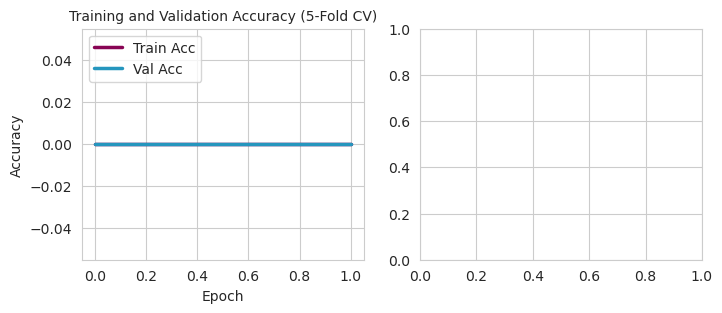

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
sns.set_style('whitegrid')
sns.set_palette('husl')

min_length = len(val_loss_all)

# Plot the averaged results - subplot 1
for acc, loss in zip(train_acc_all, train_loss_all):
    sns.lineplot(x=range(min_length), y=acc, label='Train Acc', linewidth=2.5, color='#880454', ax=axs[0])
    sns.lineplot(x=range(min_length), y=loss, label='Val Acc', linewidth=2.5, color='#2596be', ax=axs[0])
    
#     sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
#     sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

#     axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=10)
#     axs[1].set_xlabel('Epoch', fontsize=10)
#     axs[1].set_ylabel('Loss', fontsize=10)
#     axs[1].legend(loc='lower left')

axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=10)
axs[0].set_xlabel('Epoch', fontsize=10)
axs[0].set_ylabel('Accuracy', fontsize=10)
axs[0].legend(loc='upper left')


In [19]:
train_acc_all

[array([0.3387858]), array([0.31892905])]

### Load current or previous data for plotting

In [ ]:
num_folds = num_folds

TypeError: unhashable type: 'numpy.ndarray'

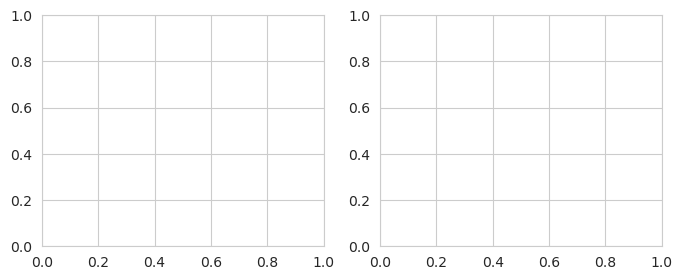

In [30]:
load_existing_data = True

if load_existing_data == True:
    
    # fetch resutls
    model_results_dir = save_dir+"/pickles"
    
    
#     with open(os.path.join(model_results_dir,'val_loss_avg.pkl'), 'rb') as f:
#         val_loss_avg = pickle.load(f)

#     with open(os.path.join(model_results_dir,'val_acc_avg.pkl'), 'rb') as f:
#         val_acc_avg = pickle.load(f)

#     with open(os.path.join(model_results_dir,'train_loss_avg.pkl'), 'rb') as f:
#         train_loss_avg = pickle.load(f)

#     with open(os.path.join(model_results_dir,'train_acc_avg.pkl'), 'rb') as f:
#         train_acc_avg = pickle.load(f)
        
#     with open(os.path.join(model_results_dir,'train_acc_avg.pkl'), 'rb') as f:
#         train_acc_avg = pickle.load(f)
    
#     with open(os.path.join(model_results_dir,'conf_matrices.pkl'), 'rb') as f:
#         conf_matrices = pickle.load(f)
            
#     with open(os.path.join(model_results_dir,'train_labels_names.pkl'), 'rb') as f:
#         train_labels_names = pickle.load(f)
        
    
    with open(os.path.join(model_results_dir,'val_loss_all.pkl'), 'rb') as f:
        val_loss_avg = pickle.load(f)
        val_loss_avg = pd.DataFrame(val_loss_avg)


    with open(os.path.join(model_results_dir,'val_acc_all.pkl'), 'rb') as f:
        val_acc_avg = pickle.load(f)

    with open(os.path.join(model_results_dir,'train_loss_all.pkl'), 'rb') as f:
        train_loss_avg = pickle.load(f)

    with open(os.path.join(model_results_dir,'train_acc_all.pkl'), 'rb') as f:
        train_acc_avg = pickle.load(f)
        
    # with open(os.path.join(model_results_dir,'train_acc_avg.pkl'), 'rb') as f:
    #     train_acc_avg = pickle.load(f)
    
    with open(os.path.join(model_results_dir,'conf_matrices.pkl'), 'rb') as f:
        conf_matrices = pickle.load(f)
            
    # with open(os.path.join(model_results_dir,'train_labels_names.pkl'), 'rb') as f:
    #     train_labels_names = pickle.load(f)
    
#     with open(os.path.join(model_acc_dir,'cm_avg.pkl'), 'rb') as f:
#         cm_avg = pickle.load(f)
#     # with open(os.path.join(model_acc_dir,'accuracies.pkl'), 'rb') as f:
#     #     cm_avg = accuracies.load(f)

#     with open(os.path.join(model_acc_dir,'losses.pkl'), 'rb') as f:
#         losses = pickle.load(f)

#     with open(os.path.join(model_acc_dir,'shuffled_accuracies.pkl'), 'rb') as f:
#         shuffled_accuracies = pickle.load(f)

#     with open(os.path.join(model_acc_dir,'shuffled_cm_avg.pkl'), 'rb') as f:
#         shuffled_cm_avg = pickle.load(f)
        
#     with open(os.path.join(model_acc_dir,'shuffled_losses.pkl'), 'rb') as f:
#         shuffled_losses = pickle.load(f)
        
#     with open(os.path.join(model_acc_dir,'train_labels_names.pkl'), 'rb') as f:
#         train_labels_names = pickle.load(f)
    
        

    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    sns.set_style('whitegrid')
    sns.set_palette('husl')

    min_length = len(val_loss_all)

    # Plot the averaged results - subplot 1
    sns.lineplot(x=range(min_length), y=train_acc_avg, label='Train Acc', linewidth=2.5, color='#880454', ax=axs[0])
    sns.lineplot(x=range(min_length), y=train_loss_avg, label='Val Acc', linewidth=2.5, color='#2596be', ax=axs[0])

    axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=10)
    axs[0].set_xlabel('Epoch', fontsize=10)
    axs[0].set_ylabel('Accuracy', fontsize=10)
    axs[0].legend(loc='upper left')

    # Plot the averaged results - subplot 2
    sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
    sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

    axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=10)
    axs[1].set_xlabel('Epoch', fontsize=10)
    axs[1].set_ylabel('Loss', fontsize=10)
    axs[1].legend(loc='lower left')
    
    
    experiment_ID = "4_output"
    

    plt.savefig(model_results_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()
    
    
    #plot the mean confusion matrix
    # mean_cm = np.mean(conf_matrices, axis=0)
    # train_labels_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
    # plt.figure(figsize=(7, 5))
    # sns.heatmap(mean_cm, annot=True, cmap='Blues', fmt='g')
    # plt.title('Mean Confusion Matrix (5-Fold CV)', fontsize=12)
    # plt.xlabel('Predicted Labels', fontsize=12)
    # plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, ha='center', fontsize=7)
    # plt.ylabel('True Labels', fontsize=12)
    # plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=7)
    # plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=600)
    # plt.show()
    
    
    mean_cm = np.mean(conf_matrices, axis=0)
    train_labels_names = ['grooming', 'frozen', 'not moving', 'moving', 'right turn', 'left turn']    
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_cm, annot=False, cmap='Blues', fmt='g')
    plt.title('Mean Confusion Matrix - (5-Fold CV)', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=10)
    plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    plt.ylabel('True Labels', fontsize=10)
    plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=300)
    plt.show()

## Average F1-Score for each Fold

In [31]:
# Create bar plot
# x = np.arange(1, 6)
# width = 0.3

f1_list = []
for conf_matrix in conf_matrices:
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)
    f1_list.append(np.mean(f1))

labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# Choose a color palette from seaborn's built-in palettes
color_palette = 'Set2'

ax = sns.barplot(x=labels, y=f1_list, color = "#2596be")
plt.xlabel('Fold', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('Average F1-Score for each Fold', fontsize=14, fontweight='bold')

# Add value annotations inside each bar
for i, v in enumerate(f1_list):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
plt.show()

# fig, ax = plt.subplots(figsize=(4, 4))

# ax.bar(x + width, f1_list, width, label='F1-Score', color='navy')

# ax.set_title('Average F1-Score per Fold', fontsize=14, fontweight='bold')
# ax.set_xlabel('Fold', fontsize=12)
# ax.set_ylabel('Score', fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(np.arange(1, 6), rotation=0, fontsize=12)
# ax.legend()

# ax.grid(True, linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
# plt.show()

/tmp/ipykernel_152338/4250714867.py:7: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)


KeyError: 'Fold 1'

## Mean CM and Average Precision, Recall, and F1-Score per Behaviour Label for the Mean CM

/tmp/ipykernel_152338/3526218989.py:2: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(mean_cm) / np.sum(mean_cm, axis=0)


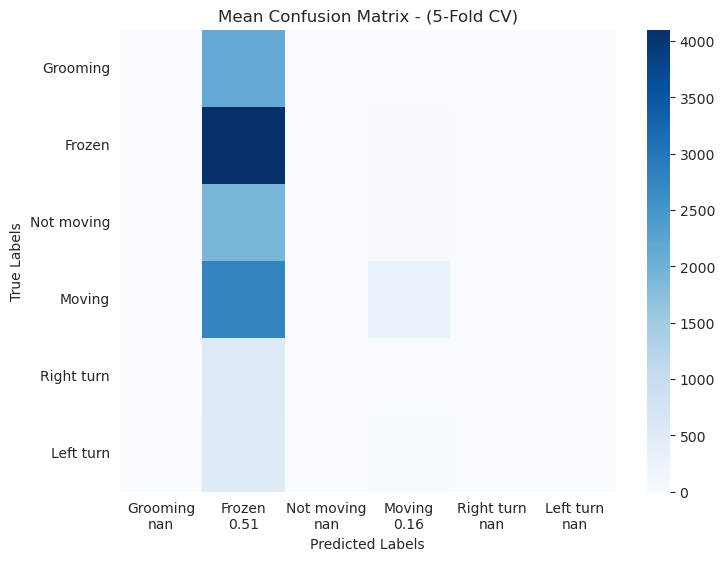

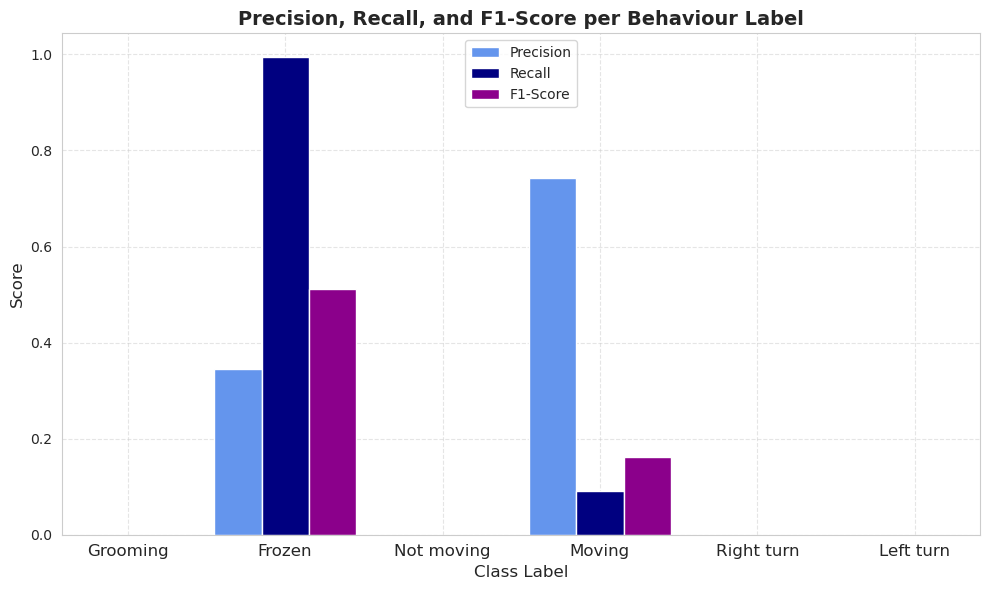

Label: Grooming
Precision: nan
Recall: 0.00
F1-Score: nan

Label: Frozen
Precision: 0.34
Recall: 0.99
F1-Score: 0.51

Label: Not moving
Precision: nan
Recall: 0.00
F1-Score: nan

Label: Moving
Precision: 0.74
Recall: 0.09
F1-Score: 0.16

Label: Right turn
Precision: nan
Recall: 0.00
F1-Score: nan

Label: Left turn
Precision: nan
Recall: 0.00
F1-Score: nan



NameError: name 'csv' is not defined

In [32]:
# Calculate precision, recall, and F1-score per class label
precision = np.diag(mean_cm) / np.sum(mean_cm, axis=0)
recall = np.diag(mean_cm) / np.sum(mean_cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# Create labels with F1-score included
f1_labels = [f"{label}\n{f1_score:.2f}" for label, f1_score in zip(train_labels_names, f1)]

# Plot mean confusion matrix with F1-score labels
plt.figure(figsize=(8, 6))
ax = sns.heatmap(mean_cm, annot=False, cmap='Blues', fmt='g', annot_kws={"fontsize": 10}, xticklabels=f1_labels, yticklabels=train_labels_names)

plt.title('Mean Confusion Matrix - (5-Fold CV)', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=10)
plt.ylabel('True Labels', fontsize=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.savefig("mean_CM.svg", bbox_inches='tight', dpi=300)
plt.show()


# # Create bar plot
# x = np.arange(len(train_labels_names))
# width = 0.2

# fig, ax = plt.subplots(figsize=(8, 6))
# bars_precision = ax.bar(x, precision, width, label='Precision', color='blue')
# bars_recall = ax.bar(x + width, recall, width, label='Recall', color='lightblue')
# bars_f1 = ax.bar(x + (2 * width), f1, width, label='F1-Score', color='darkblue')

# ax.set_title('Precision, Recall, and F1-Score per Class Label', fontsize=12)
# ax.set_xlabel('Class Label', fontsize=10)
# ax.set_ylabel('Score', fontsize=10)
# ax.set_xticks(x + width)
# ax.set_xticklabels(train_labels_names, rotation=45)
# ax.legend()


# plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
# plt.show()

# Calculate precision, recall, and F1-score per class label
# precision = np.diag(mean_cm) / np.sum(mean_cm, axis=0)
# recall = np.diag(mean_cm) / np.sum(mean_cm, axis=1)
# f1 = 2 * (precision * recall) / (precision + recall)


# Create bar plot
x = np.arange(len(train_labels_names))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, precision, width, label='Precision', color='cornflowerblue')
ax.bar(x, recall, width, label='Recall', color='navy')
ax.bar(x + width, f1, width, label='F1-Score', color='darkmagenta')

ax.set_title('Precision, Recall, and F1-Score per Behaviour Label', fontsize=14, fontweight='bold')
ax.set_xlabel('Class Label', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(train_labels_names, rotation=0, fontsize=12)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
plt.show()




# Print precision, recall, and F1-score per class label
for label, prec, rec, f1_score in zip(train_labels_names, precision, recall, f1):
    print(f"Label: {label}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1_score:.2f}")
    print()

# Save results to CSV
model_results_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/Experiment_4-BPNNt_output/results"
csv_path = model_results_dir + "/results.csv"

with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Label", "Precision", "Recall", "F1-Score"])  # Write header
    for label, prec, rec, f1_score in zip(train_labels_names, precision, recall, f1):
        writer.writerow([label, f"{prec:.2f}", f"{rec:.2f}", f"{f1_score:.2f}"])

print(f"Results saved to: {csv_path}")







## F1-Score per Label for each Fold

/tmp/ipykernel_152338/3209286340.py:4: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and

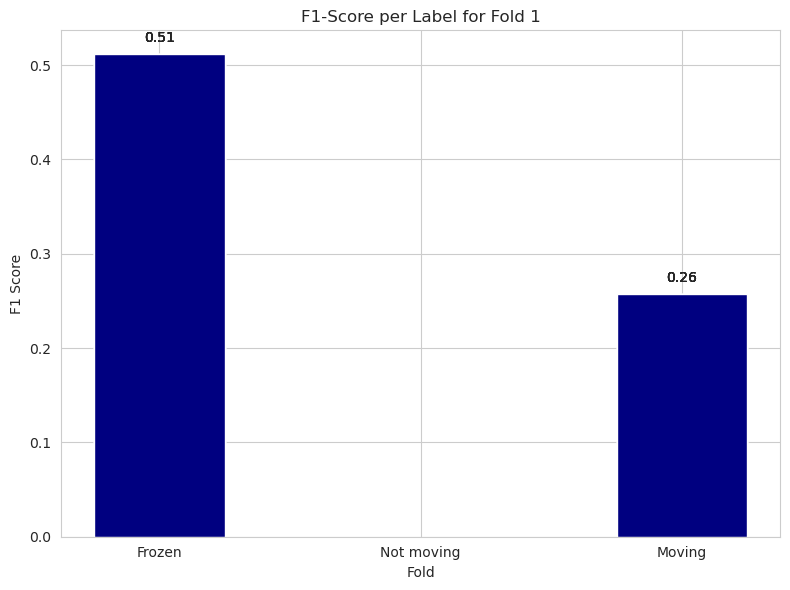

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

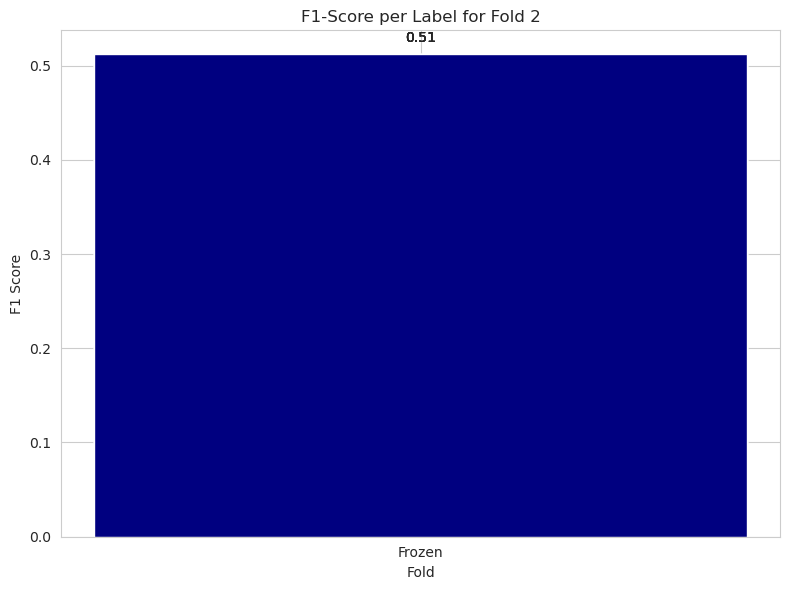

In [33]:
f1_list = []
j = 1
for conf_matrix in conf_matrices:
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)
    f1 = np.transpose(f1)
    f1_list.append(f1)

    fig, ax = plt.subplots(figsize=(8, 6))

    for i, label in enumerate(train_labels_names):
        ax.bar(train_labels_names, f1, width=0.5, label=label, color="navy")
        for x, y in enumerate(f1):
            ax.text(x, y + 0.01, f"{y:.2f}", ha='center', va='bottom', fontsize=10)

    ax.set_title('F1-Score per Label for Fold ' + str(j), fontsize=12)
    j = j + 1
    ax.set_xlabel('Fold', fontsize=10)
    ax.set_ylabel('F1 Score', fontsize=10)

    plt.tight_layout()
    plt.savefig(f"score_bar_plot_fold_{j}.svg", bbox_inches='tight', dpi=300)
    plt.show()


In [ ]:
# # For plotting the barplot

# # Create bar plot
# x = np.arange(len(train_labels_names))
# width = 0.3

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.bar(x - width, precision, width, label='Precision', color='cornflowerblue')
# ax.bar(x, recall, width, label='Recall', color='navy')
# ax.bar(x + width, f1, width, label='F1-Score', color='darkmagenta')

# ax.set_title('Precision, Recall, and F1-Score per Behaviour Label', fontsize=14, fontweight='bold')
# ax.set_xlabel('Class Label', fontsize=12)
# ax.set_ylabel('Score', fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(train_labels_names, rotation=0, fontsize=12)
# ax.legend()

# ax.grid(True, linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
# plt.show()

## Load Shuffled data

In [ ]:
load_existing_shuffled_data = True

if load_existing_shuffled_data == True:
    
    # fetch resutls
    model_shuffled_results_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/Experiment_4 - BPNNt - chance_output/results"
    
    
    with open(os.path.join(model_shuffled_results_dir,'val_loss_avg.pkl'), 'rb') as f:
        val_loss_avg_shuffled = pickle.load(f)

    with open(os.path.join(model_shuffled_results_dir,'val_acc_avg.pkl'), 'rb') as f:
        val_acc_avg_shuffled = pickle.load(f)

    with open(os.path.join(model_shuffled_results_dir,'train_loss_avg.pkl'), 'rb') as f:
        train_loss_avg_shuffled = pickle.load(f)

    with open(os.path.join(model_shuffled_results_dir,'train_acc_avg.pkl'), 'rb') as f:
        train_acc_avg_shuffled = pickle.load(f)
        
    with open(os.path.join(model_shuffled_results_dir,'train_acc_avg.pkl'), 'rb') as f:
        train_acc_avg_shuffled = pickle.load(f)
    
    with open(os.path.join(model_shuffled_results_dir,'conf_matrices.pkl'), 'rb') as f:
        conf_matrices_shuffled = pickle.load(f)
            
    with open(os.path.join(model_shuffled_results_dir,'train_labels_names.pkl'), 'rb') as f:
        train_labels_names = pickle.load(f)
    


#     with open(os.path.join(model_acc_dir,'cm_avg.pkl'), 'rb') as f:
#         cm_avg = pickle.load(f)
#     # with open(os.path.join(model_acc_dir,'accuracies.pkl'), 'rb') as f:
#     #     cm_avg = accuracies.load(f)

#     with open(os.path.join(model_acc_dir,'losses.pkl'), 'rb') as f:
#         losses = pickle.load(f)

#     with open(os.path.join(model_acc_dir,'shuffled_accuracies.pkl'), 'rb') as f:
#         shuffled_accuracies = pickle.load(f)

#     with open(os.path.join(model_acc_dir,'shuffled_cm_avg.pkl'), 'rb') as f:
#         shuffled_cm_avg = pickle.load(f)
        
#     with open(os.path.join(model_acc_dir,'shuffled_losses.pkl'), 'rb') as f:
#         shuffled_losses = pickle.load(f)
        
#     with open(os.path.join(model_acc_dir,'train_labels_names.pkl'), 'rb') as f:
#         train_labels_names = pickle.load(f)
    
        

    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    sns.set_style('whitegrid')
    sns.set_palette('husl')

    min_length = len(val_loss_avg_shuffled)

    # Plot the averaged results - subplot 1
    sns.lineplot(x=range(min_length), y=train_acc_avg_shuffled, label='Train Acc', linewidth=2.5, color='#880454', ax=axs[0])
    sns.lineplot(x=range(min_length), y=val_acc_avg_shuffled, label='Val Acc', linewidth=2.5, color='#2596be', ax=axs[0])

    axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=10)
    axs[0].set_xlabel('Epoch', fontsize=10)
    axs[0].set_ylabel('Accuracy', fontsize=10)
    axs[0].legend(loc='upper left')

    # Plot the averaged results - subplot 2
    sns.lineplot(x=range(min_length), y=train_loss_avg_shuffled, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
    sns.lineplot(x=range(min_length), y=val_loss_avg_shuffled, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

    axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=10)
    axs[1].set_xlabel('Epoch', fontsize=10)
    axs[1].set_ylabel('Loss', fontsize=10)
    axs[1].legend(loc='lower left')
    
    
    experiment_ID = "4_shuffled_output"
    

    plt.savefig(model_results_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()
    
    
    #plot the mean confusion matrix
    # mean_cm = np.mean(conf_matrices, axis=0)
    # train_labels_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
    # plt.figure(figsize=(7, 5))
    # sns.heatmap(mean_cm, annot=True, cmap='Blues', fmt='g')
    # plt.title('Mean Confusion Matrix (5-Fold CV)', fontsize=12)
    # plt.xlabel('Predicted Labels', fontsize=12)
    # plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, ha='center', fontsize=7)
    # plt.ylabel('True Labels', fontsize=12)
    # plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=7)
    # plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=600)
    # plt.show()
    
    
    mean_cm_shuffled = np.mean(conf_matrices_shuffled, axis=0)
    train_labels_names = ['grooming', 'frozen', 'not moving', 'moving', 'right turn', 'left turn']    
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_cm_shuffled, annot=False, cmap='Blues', fmt='g')
    plt.title('Mean Confusion Matrix - (5-Fold CV)', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=10)
    plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    plt.ylabel('True Labels', fontsize=10)
    plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=300)
    plt.show()

In [ ]:
mean_cm_shuffled

In [ ]:
# # conf matrices
# f1_list = []
# for conf_matrix in conf_matrices_shuffled:
#     precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
#     recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
#     f1 = 2 * (precision * recall) / (precision + recall)
#     f1_list.append(np.mean(f1))

# labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# # Choose a color palette from seaborn's built-in palettes
# color_palette = 'Set2'

# ax = sns.barplot(x=labels, y=f1_list, color = "navy")
# plt.xlabel('Fold', fontsize=12)
# plt.ylabel('F1 Score', fontsize=12)
# plt.title('Average F1-Score for each Fold', fontsize=14, fontweight='bold')

# # Add value annotations inside each bar
# for i, v in enumerate(f1_list):
#     ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# plt.tight_layout()
# plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
# plt.show()




## Load BPSVMt one video

In [ ]:
load_existing_shuffled_data = True

if load_existing_shuffled_data == True:
    
    # fetch resutls
    BPSVMt_results_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/Exp_4.3_BPSVMt_one_video_output/results"
    
    
#     with open(os.path.join(model_shuffled_results_dir,'val_loss_avg.pkl'), 'rb') as f:
#         val_loss_avg_shuffled = pickle.load(f)

#     with open(os.path.join(model_shuffled_results_dir,'val_acc_avg.pkl'), 'rb') as f:
#         val_acc_avg_shuffled = pickle.load(f)

#     with open(os.path.join(model_shuffled_results_dir,'train_loss_avg.pkl'), 'rb') as f:
#         train_loss_avg_shuffled = pickle.load(f)

#     with open(os.path.join(model_shuffled_results_dir,'train_acc_avg.pkl'), 'rb') as f:
#         train_acc_avg_shuffled = pickle.load(f)
        
#     with open(os.path.join(model_shuffled_results_dir,'train_acc_avg.pkl'), 'rb') as f:
#         train_acc_avg_shuffled = pickle.load(f)
    
#     with open(os.path.join(model_shuffled_results_dir,'conf_matrices.pkl'), 'rb') as f:
#         conf_matrices_shuffled = pickle.load(f)
            
#     with open(os.path.join(model_shuffled_results_dir,'train_labels_names.pkl'), 'rb') as f:
#         train_labels_names = pickle.load(f)
    


    with open(os.path.join(BPSVMt_results_dir,'cm_avg.pkl'), 'rb') as f:
        cm_avg = pickle.load(f)

    with open(os.path.join(BPSVMt_results_dir,'accuracies.pkl'), 'rb') as f:
        accuracies = pickle.load(f)

    with open(os.path.join(BPSVMt_results_dir,'losses.pkl'), 'rb') as f:
        losses = pickle.load(f)

    with open(os.path.join(BPSVMt_results_dir,'shuffled_accuracies.pkl'), 'rb') as f:
        shuffled_accuracies = pickle.load(f)

    with open(os.path.join(BPSVMt_results_dir,'shuffled_cm_avg.pkl'), 'rb') as f:
        shuffled_cm_avg = pickle.load(f)
        
    with open(os.path.join(BPSVMt_results_dir,'shuffled_losses.pkl'), 'rb') as f:
        shuffled_losses = pickle.load(f)
        
    # with open(os.path.join(model_acc_dir,'train_labels_names.pkl'), 'rb') as f:
    #     train_labels_names = pickle.load(f)
    
        

#     fig, axs = plt.subplots(1, 2, figsize=(8, 3))
#     sns.set_style('whitegrid')
#     sns.set_palette('husl')

#     min_length = len(val_loss_avg_shuffled)

#     # Plot the averaged results - subplot 1
#     sns.lineplot(x=range(min_length), y=train_acc_avg_shuffled, label='Train Acc', linewidth=2.5, color='#880454', ax=axs[0])
#     sns.lineplot(x=range(min_length), y=val_acc_avg_shuffled, label='Val Acc', linewidth=2.5, color='#2596be', ax=axs[0])

#     axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=10)
#     axs[0].set_xlabel('Epoch', fontsize=10)
#     axs[0].set_ylabel('Accuracy', fontsize=10)
#     axs[0].legend(loc='upper left')

#     # Plot the averaged results - subplot 2
#     sns.lineplot(x=range(min_length), y=train_loss_avg_shuffled, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
#     sns.lineplot(x=range(min_length), y=val_loss_avg_shuffled, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

#     axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=10)
#     axs[1].set_xlabel('Epoch', fontsize=10)
#     axs[1].set_ylabel('Loss', fontsize=10)
#     axs[1].legend(loc='lower left')
    
    
#     experiment_ID = "4_shuffled_output"
    

    plt.savefig(model_results_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()
    
    #plot the mean confusion matrix
    mean_cm_BPSVMt = np.mean(conf_matrices, axis=0)
    
    BPSVMt_precision = np.diag(mean_cm_BPSVMt) / np.sum(mean_cm_BPSVMt, axis=0)
    BPSVMt_recall = np.diag(mean_cm_shuffled) / np.sum(mean_cm_shuffled, axis=1)
    BPSVMt_f1 = 2 * (BPSVMt_precision * BPSVMt_recall) / (BPSVMt_precision + BPSVMt_recall)
    
    # Create labels with F1-score included
    f1_labels_BPSVMMt = [f"{label}\n{f1_score:.2f}" for label, f1_score in zip(train_labels_names, BPSVMt_f1)]

#     # Plot mean confusion matrix with F1-score labels
#     plt.figure(figsize=(8, 6))
#     ax = sns.heatmap(mean_cm, annot=False, cmap='Blues', fmt='g', )

#     plt.title('Mean Confusion Matrix - (5-Fold CV)', fontsize=12)
#     plt.xlabel('Predicted Labels', fontsize=10)
#     plt.ylabel('True Labels', fontsize=10)
#     plt.xticks(rotation=0)
#     plt.yticks(rotation=0)
#     plt.savefig("mean_CM.svg", bbox_inches='tight', dpi=300)
#     plt.show()
    
    

    # train_labels_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
    plt.figure(figsize=(7, 5))
    sns.heatmap(mean_cm, annot=False, cmap='Blues', fmt='g', annot_kws={"fontsize": 10}, xticklabels=f1_labels_BPSVMMt, yticklabels=train_labels_names, vmin=np.min(mean_cm), vmax=np.max(mean_cm))
    plt.title('Mean Confusion Matrix (5-Fold CV)', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, ha='center', fontsize=7)
    plt.ylabel('True Labels', fontsize=12)
    plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=7)
    plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=600)
    plt.show()
    
    
    
    

    # mean_cm_shuffled = np.mean(conf_matrices_shuffled, axis=0)
    # # train_labels_names = ['grooming', 'frozen', 'not moving', 'moving', 'right turn', 'left turn']    
    # plt.figure(figsize=(7, 5))
    # sns.heatmap(mean_cm_shuffled, annot=False, cmap='Blues', fmt='g', vmin=np.min(mean_cm), vmax=np.max(mean_cm))
    # plt.title('Mean Confusion Matrix - (5-Fold CV)', fontsize=12)
    # plt.xlabel('Predicted Labels', fontsize=10)
    # plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    # plt.ylabel('True Labels', fontsize=10)
    # plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    # plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=300)
    # plt.show()






In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1-score per class label
precision = np.diag(mean_cm) / np.sum(mean_cm, axis=0)
recall = np.diag(mean_cm) / np.sum(mean_cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# # Calculate the shuffled precision, recall, and F1-score per class label
shuffled_precision = np.diag(mean_cm_shuffled) / np.sum(mean_cm_shuffled, axis=0)
shuffled_recall = np.diag(mean_cm_shuffled) / np.sum(mean_cm_shuffled, axis=1)
shuffled_f1 = 2 * (shuffled_precision * shuffled_recall) / (shuffled_precision + shuffled_recall)


# Calculate the shuffled precision, recall, and F1-score per class label
BPSVMt_precision = np.diag(mean_cm_BPSVMt) / np.sum(mean_cm_BPSVMt, axis=0)
BPSVMt_recall = np.diag(mean_cm_shuffled) / np.sum(mean_cm_shuffled, axis=1)
BPSVMt_f1 = 2 * (BPSVMt_precision * BPSVMt_recall) / (BPSVMt_precision + BPSVMt_recall)

# Create bar plot
x = np.arange(len(train_labels_names))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision and shuffled precision with a dash line separator
# ax.bar(x - width / 2, precision, width, label='Precision', color='cornflowerblue')
# ax.bar(x - width / 2, shuffled_precision, width, label='Shuffled Precision', color='royalblue')

# # Plot recall and shuffled recall with a dash line separator
# ax.bar(x + width / 2, recall, width, label='Recall', color='lightblue')
# ax.bar(x + width / 2, shuffled_recall, width, label='Shuffled Recall', color='powderblue')

# # Plot F1-score and shuffled F1-score with a dash line separator
# ax.bar(x + 3 * width / 2, f1, width, label='F1-Score', color='plum')
# ax.bar(x + 3 * width / 2, shuffled_f1, width, label='Shuffled F1-Score', color='thistle')

# Plot precision and shuffled precision with a dash line separator
# ax.bar(x - width / 2, precision, width, label='Precision', color='cornflowerblue')
# ax.bar(x - width / 2, shuffled_precision, width, label='Shuffled Precision', color='cornflowerblue')

# # Plot recall and shuffled recall with a dash line separator
# ax.bar(x + width / 2, recall, width, label='Recall', color='lightblue')
# ax.bar(x + width / 2, shuffled_recall, width, label='Shuffled Recall', color='lightblue')

# # Plot F1-score and shuffled F1-score with a dash line separator
# ax.bar(x + 3 * width / 2, f1, width, label='F1-Score', color='plum')
# ax.bar(x + 3 * width / 2, shuffled_f1, width, label='Shuffled F1-Score', color='plum')


# Plot precision and shuffled precision with a dash line separator
ax.bar(x - width / 2, precision, width, label='Precision', color='cornflowerblue')
ax.bar(x - width / 2, BPSVMt_precision, width, label='BPSVMt Precision', color='royalblue')
# ax.bar(x - width / 2, shuffled_precision, width, label='Chance Precision', color='royalblue')

# Plot recall and shuffled recall with a dash line separator
ax.bar(x + width / 2, recall, width, label='Recall', color='lightblue')
ax.bar(x + width / 2, BPSVMt_recall, width, label='BPSVMt Recall', color='powderblue')
# ax.bar(x + width / 2, shuffled_recall, width, label='Chance Recall', color='powderblue')

# Plot F1-score and shuffled F1-score with a dash line separator
ax.bar(x + 3 * width / 2, f1, width, label='F1-Score', color='thistle')
ax.bar(x + 3 * width / 2, BPSVMt_f1, width, label='BPSVMt F1-Score', color='plum')
# ax.bar(x + 3 * width / 2, shuffled_f1, width, label='Chance F1-Score', color='plum')



# # Add numbers on top of each bar
# for i, val in enumerate(precision):
#     ax.annotate(f"{val:.2f}", (x[i] - width / 2, val), ha='center', va='bottom', fontsize=10)
# for i, val in enumerate(shuffled_precision):
#     ax.annotate(f"{val:.2f}", (x[i] - width / 2, val), ha='center', va='bottom', fontsize=10)
# for i, val in enumerate(recall):
#     ax.annotate(f"{val:.2f}", (x[i] + width / 2, val), ha='center', va='bottom', fontsize=10)
# for i, val in enumerate(shuffled_recall):
#     ax.annotate(f"{val:.2f}", (x[i] + width / 2, val), ha='center', va='bottom', fontsize=10)
# for i, val in enumerate(f1):
#     ax.annotate(f"{val:.2f}", (x[i] + 3 * width / 2, val), ha='center', va='bottom', fontsize=10)
# for i, val in enumerate(shuffled_f1):
#     ax.annotate(f"{val:.2f}", (x[i] + 3 * width / 2, val), ha='center', va='bottom', fontsize=10)

ax.set_title('Mean Precision, Recall, and F1-Score per Behaviour Label (BPNNt & BPNNt-Chance)', fontsize=14, fontweight='bold')
ax.set_xlabel('Class Label', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(train_labels_names, rotation=0, fontsize=12)

# Modify the legend to show only Precision, Recall, and F1-Score
handles, labels = ax.get_legend_handles_labels()
legend_handles = [handles[0], handles[1], handles[2], handles[3], handles[4], handles[5]]
legend_labels = [labels[0], labels[1], labels[2], labels[3], labels[4], labels[5]]
ax.legend(legend_handles, legend_labels)

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as n
# Calculate precision, recall, and F1-score per class label
precision = np.diag(mean_cm) / np.sum(mean_cm, axis=0)
recall = np.diag(mean_cm) / np.sum(mean_cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate the shuffled precision, recall, and F1-score per class label
shuffled_precision = np.diag(mean_cm_shuffled) / np.sum(mean_cm_shuffled, axis=0)
shuffled_recall = np.diag(mean_cm_shuffled) / np.sum(mean_cm_shuffled, axis=1)
shuffled_f1 = 2 * (shuffled_precision * shuffled_recall) / (shuffled_precision + shuffled_recall)

# Calculate the BPSVMt precision, recall, and F1-score per class label
BPSVMt_precision = np.diag(mean_cm_BPSVMt) / np.sum(mean_cm_BPSVMt, axis=0)
BPSVMt_recall = np.diag(mean_cm_BPSVMt) / np.sum(mean_cm_BPSVMt, axis=1)
BPSVMt_f1 = 2 * (BPSVMt_precision * BPSVMt_recall) / (BPSVMt_precision + BPSVMt_recall)

# Create bar plot
x = np.arange(len(train_labels_names))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision and BPSVMt precision with a dash line separator
ax.bar(x - width / 2, precision, width, label='Precision')
ax.bar(x - width / 2, BPSVMt_precision, width, label='BPSVMt Precision')

# Plot recall and BPSVMt recall with a dash line separator
ax.bar(x + width / 2, recall, width, label='Recall')
ax.bar(x + width / 2, BPSVMt_recall, width, label='BPSVMt Recall')

# Plot F1-score and BPSVMt F1-score with a dash line separator
ax.bar(x + 3 * width / 2, f1, width, label='F1-Score')
ax.bar(x + 3 * width / 2, BPSVMt_f1, width, label='BPSVMt F1-Score')

ax.set_title('Mean Precision, Recall, and F1-Score per Behaviour Label (BPNNt & BPNNt-Chance)', fontsize=14, fontweight='bold')
ax.set_xlabel('Class Label', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(train_labels_names, rotation=0, fontsize=12)

ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
plt.show()


## Load BPSVMt data

In [ ]:
load_existing_shuffled_data = True

if load_existing_shuffled_data:
    # Fetch results
    model_results_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/Exp_4.3.2-BPSVMt-one-video_output/results"

    with open(os.path.join(model_results_dir, 'cm_avg.pkl'), 'rb') as f:
        cm_avg = pickle.load(f)
    with open(os.path.join(model_results_dir, 'accuracies.pkl'), 'rb') as f:
        accuracies = pickle.load(f)
    with open(os.path.join(model_results_dir, 'losses.pkl'), 'rb') as f:
        losses = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_accuracies.pkl'), 'rb') as f:
        shuffled_accuracies = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_cm_avg.pkl'), 'rb') as f:
        shuffled_cm_avg = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_losses.pkl'), 'rb') as f:
        shuffled_losses = pickle.load(f)
    # with open(os.path.join(model_results_dir, 'train_labels_names.pkl'), 'rb') as f:
    #     train_labels_names = pickle.load(f)

    n_splits = 5
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy and Shuffled Accuracy
    ax1 = axs[0, 0]
    bar_width = 0.4
    index = np.arange(1, n_splits + 1)
    ax1.bar(index - bar_width / 2, accuracies, width=bar_width, color='#880454', label='Accuracy')
    # ax1.bar(index + bar_width/2, shuffled_accuracies, width=bar_width, color='#2596be', label='Chance Accuracy')
    ax1.set_xlabel("Fold", fontsize=12)
    ax1.set_ylabel("Accuracy", fontsize=12)
    ax1.set_title("Accuracy per Fold (5-Fold CV)")
    # ax1.legend()

    # # Loss and Shuffled Loss
    # ax2 = axs[0, 1]
    # ax2.bar(index - bar_width / 2, losses, width=bar_width, color='#880454', label='Loss')
    # # ax2.bar(index + bar_width/2, shuffled_losses, width=bar_width, color='#2596be', label='Chance Loss')
    # ax2.set_xlabel("Fold", fontsize=12)
    # ax2.set_ylabel("Loss", fontsize=12)
    # ax2.set_title("Loss per Fold (5-Fold CV)")
    # # ax2.legend()

    # Average Confusion Matrix for Regular Labels
    ax3 = axs[1, 0]
    # label_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
    sns.heatmap(np.mean(cm_avg, axis=0), annot=False, cmap='Blues', fmt='g', ax=ax3)
    ax3.set_title('Average Confusion Matrix Per Fold (5-Fold CV)')
    ax3.set_xlabel('Predicted Labels', fontsize=12)
    ax3.set_xticks(np.arange(len(train_labels_names)))
    ax3.set_xticklabels(train_labels_names, ha='center', fontsize=8)
    ax3.set_ylabel('True Labels', fontsize=12)
    ax3.set_yticks(np.arange(len(train_labels_names)))
    ax3.set_yticklabels(train_labels_names, rotation=0, fontsize=8)

    # # Average Confusion Matrix for Shuffled Labels
    # ax4 = axs[1, 1]
    # sns.heatmap(np.mean(shuffled_cm_avg, axis=0), annot=False, cmap='Blues', fmt='g', ax=ax4)
    # ax4.set_title('Average Confusion Matrix (5-Fold CV - Shuffled Labels)')
    # ax4.set_xlabel('Predicted Labels', fontsize=12)
    # ax4.set_xticks(np.arange(len(train_labels_names)))
    # ax4.set_xticklabels(train_labels_names, ha='center', fontsize=8)
    # ax4.set_ylabel('True Labels', fontsize=12)
    # ax4.set_yticks(np.arange(len(train_labels_names)))
    # ax4.set_yticklabels(train_labels_names, rotation=0, fontsize=8)

    plt.tight_layout(pad=3.0)  # Increase spacing between subplots
    save_SVM_plots = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/4-BPSVM_output/"
    plt.savefig(save_SVM_plots + "/accuracy_loss_cm_regular_shuffled_labels.svg", dpi=600, bbox_inches='tight')
    plt.show()


In [ ]:
mean_cm_bpsvm = np.mean(cm_avg, axis=0)

In [ ]:
mean_cm_bpsvm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1-score per class label
precision = np.diag(mean_cm) / np.sum(mean_cm, axis=0)
recall = np.diag(mean_cm) / np.sum(mean_cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate the shuffled precision, recall, and F1-score per class label
shuffled_precision = np.diag(mean_cm_shuffled) / np.sum(mean_cm_shuffled, axis=0)
shuffled_recall = np.diag(mean_cm_shuffled) / np.sum(mean_cm_shuffled, axis=1)
shuffled_f1 = 2 * (shuffled_precision * shuffled_recall) / (shuffled_precision + shuffled_recall)

# Calculate precision, recall, and F1-score per class label for BPSVM
bpsvm_precision = np.diag(mean_cm_bpsvm) / np.sum(mean_cm_bpsvm, axis=0)
bpsvm_recall = np.diag(mean_cm_bpsvm) / np.sum(mean_cm_bpsvm, axis=1)
bpsvm_f1 = 2 * (bpsvm_precision * bpsvm_recall) / (bpsvm_precision + bpsvm_recall)

# Create bar plot
x = np.arange(len(train_labels_names))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

# Plot precision, recall, and F1-score for BPNNt
ax.bar(x - width, precision, width, label='BPNNt Precision', color='cornflowerblue')
ax.bar(x, recall, width, label='BPNNt Recall', color='lightblue')
ax.bar(x + width, f1, width, label='BPNNt F1-Score', color='plum')

# # Plot shuffled precision, recall, and F1-score
# ax.bar(x - width, shuffled_precision, width, label='BPNNt-Chance Precision', color='cornflowerblue')
# ax.bar(x, shuffled_recall, width, label='BPNNt-Chance Recall', color='lightblue')
# ax.bar(x + width, shuffled_f1, width, label='BPNNt-Chance F1-Score', color='plum')

# Plot precision, recall, and F1-score for BPSVM
ax.bar(x - width, bpsvm_precision, width, label='BPSVMt Precision', color='cornflowerblue')
ax.bar(x, bpsvm_recall, width, label='BPSVMt Recall', color='lightblue')
ax.bar(x + width, bpsvm_f1, width, label='BPSVMt F1-Score', color='plum')





ax.set_title('Mean Precision, Recall, and F1-Score per Behaviour Label (BPNNt, BPNNt-Chance & BPSVMt)', fontsize=14, fontweight='bold')
ax.set_xlabel('Class Label', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(train_labels_names, rotation=0, fontsize=12)

ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("score_bar_plot.svg", bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
# f1_list = []
# for conf_matrix in cm_avg:
#     precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
#     recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
#     f1 = 2 * (precision * recall) / (precision + recall)
#     f1_list.append(np.mean(f1))

## Plot BPSVM and Chance level new plots:

In [ ]:
load_existing_shuffled_data = True

if load_existing_shuffled_data:
    # Fetch results
    model_results_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/Exp_4.3_BPSVMt_multiple_videos_output/results"

    with open(os.path.join(model_results_dir, 'cm_avg.pkl'), 'rb') as f:
        cm_avg = pickle.load(f)
    with open(os.path.join(model_results_dir, 'accuracies.pkl'), 'rb') as f:
        accuracies = pickle.load(f)
    with open(os.path.join(model_results_dir, 'losses.pkl'), 'rb') as f:
        losses = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_accuracies.pkl'), 'rb') as f:
        shuffled_accuracies = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_cm_avg.pkl'), 'rb') as f:
        shuffled_cm_avg = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_losses.pkl'), 'rb') as f:
        shuffled_losses = pickle.load(f)
    # with open(os.path.join(model_results_dir, 'train_labels_names.pkl'), 'rb') as f:
    #     train_labels_names = pickle.load(f)

    n_splits = 5
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Accuracy and Shuffled Accuracy
    ax1 = axs[0, 0]
    bar_width = 0.4
    index = np.arange(1, n_splits + 1)
    ax1.bar(index - bar_width / 2, accuracies, width=bar_width, color='#880454', label='Accuracy')
    ax1.bar(index + bar_width/2, shuffled_accuracies, width=bar_width, color='#2596be', label='Chance Accuracy')
    ax1.set_xlabel("Fold", fontsize=12)
    ax1.set_ylabel("Accuracy", fontsize=12)
    ax1.set_title("Accuracy per Fold (5-Fold CV)")
    ax1.legend(loc="lower left")

    # Loss and Shuffled Loss
    ax2 = axs[0, 1]
    ax2.bar(index - bar_width / 2, losses, width=bar_width, color='#880454', label='Loss')
    ax2.bar(index + bar_width/2, shuffled_losses, width=bar_width, color='#2596be', label='Chance Loss')
    ax2.set_xlabel("Fold", fontsize=12)
    ax2.set_ylabel("Loss", fontsize=12)
    ax2.set_title("Loss per Fold (5-Fold CV)")
    ax2.legend(loc="lower left")
    
    #Mean CM:
    mean_cm_bpsvm = np.mean(cm_avg, axis=0)    
    
    
    # Calculate precision, recall, and F1-score per class label
    bpsvm_precision = np.diag(mean_cm_bpsvm) / np.sum(mean_cm_bpsvm, axis=0)
    bpsvm_recall = np.diag(mean_cm_bpsvm) / np.sum(mean_cm_bpsvm, axis=1)
    f1 = 2 * (bpsvm_precision * bpsvm_recall) / (bpsvm_precision + bpsvm_recall)
    
    # Create labels with F1-score included
    f1_labels = [f"{label}\n{f1_score:.2f}" for label, f1_score in zip(train_labels_names, f1)]

    
    # Average Confusion Matrix for Regular Labels
    ax3 = axs[1, 0]
    # label_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
    sns.heatmap(np.mean(cm_avg, axis=0), annot=False, cmap='Blues', fmt='g', ax=ax3, vmin=np.min(cm_avg), vmax=np.max(cm_avg))
    ax3.set_title('Average Confusion Matrix Per Fold (5-Fold CV)')
    ax3.set_xlabel('Predicted Labels', fontsize=12)
    ax3.set_xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=12)
    ax3.set_xticklabels(train_labels_names, ha='center', fontsize=8)
    ax3.set_ylabel('True Labels', fontsize=12)
    ax3.set_yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=12)
    ax3.set_yticklabels(train_labels_names, rotation=0, fontsize=8)
    
    # add the F1-score below:

    # Average Confusion Matrix for Shuffled Labels
    ax4 = axs[1, 1]
    sns.heatmap(np.mean(shuffled_cm_avg, axis=0), annot=False, cmap='Blues', fmt='g', ax=ax4, vmin=np.min(cm_avg), vmax=np.max(cm_avg))
    ax4.set_title('Average Confusion Matrix (5-Fold CV - Shuffled Labels)')
    ax4.set_xlabel('Predicted Labels', fontsize=12)
    ax4.set_xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=12)
    ax4.set_xticklabels(train_labels_names, ha='center', fontsize=8)
    ax4.set_ylabel('True Labels', fontsize=12)
    ax4.set_yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=12)
    ax4.set_yticklabels(train_labels_names, rotation=0, fontsize=8)

    plt.tight_layout(pad=3.0)  # Increase spacing between subplots
    save_SVM_plots = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/4-BPSVM_output/"
    plt.savefig(save_SVM_plots + "/accuracy_loss_cm_regular_shuffled_labels.svg", dpi=600, bbox_inches='tight')
    plt.show()
    

    # mean_cm_shuffled = np.mean(shuffled_cm_avg, axis=0)
    # train_labels_names = ['grooming', 'frozen', 'not moving', 'moving', 'right turn', 'left turn']    
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(mean_cm_shuffled, annot=False, cmap='Blues', fmt='g')
    # plt.title('Mean Confusion Matrix - (5-Fold CV)', fontsize=12)
    # plt.xlabel('Predicted Labels', fontsize=10)
    # plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    # plt.ylabel('True Labels', fontsize=10)
    # plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    # plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=300)
    # plt.show()


## Plot BPSVMt and Chance level new plots:

In [ ]:
load_existing_shuffled_data = True

if load_existing_shuffled_data:
    # Fetch results
    model_results_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/Exp_4.3_BPSVMt_one_video_output/results" #Exp_3.3-BPSVM-multiple-videos_output/results

    with open(os.path.join(model_results_dir, 'cm_avg.pkl'), 'rb') as f:
        cm_avg = pickle.load(f)
    with open(os.path.join(model_results_dir, 'accuracies.pkl'), 'rb') as f:
        accuracies = pickle.load(f)
    with open(os.path.join(model_results_dir, 'losses.pkl'), 'rb') as f:
        losses = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_accuracies.pkl'), 'rb') as f:
        shuffled_accuracies = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_cm_avg.pkl'), 'rb') as f:
        shuffled_cm_avg = pickle.load(f)
    with open(os.path.join(model_results_dir, 'shuffled_losses.pkl'), 'rb') as f:
        shuffled_losses = pickle.load(f)
    # with open(os.path.join(model_results_dir, 'train_labels_names.pkl'), 'rb') as f:
    #     train_labels_names = pickle.load(f)

    n_splits = 5
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Accuracy and Shuffled Accuracy
    ax1 = axs[0, 0]
    bar_width = 0.4
    index = np.arange(1, n_splits + 1)
    ax1.bar(index - bar_width / 2, accuracies, width=bar_width, color='#880454', label='Accuracy')
    ax1.bar(index + bar_width/2, shuffled_accuracies, width=bar_width, color='#2596be', label='Chance Accuracy')
    ax1.set_xlabel("Fold", fontsize=12)
    ax1.set_ylabel("Accuracy", fontsize=12)
    ax1.set_title("Accuracy per Fold (5-Fold CV)")
    ax1.legend()

    # Loss and Shuffled Loss
    ax2 = axs[0, 1]
    ax2.bar(index - bar_width / 2, losses, width=bar_width, color='#880454', label='Loss')
    ax2.bar(index + bar_width/2, shuffled_losses, width=bar_width, color='#2596be', label='Chance Loss')
    ax2.set_xlabel("Fold", fontsize=12)
    ax2.set_ylabel("Loss", fontsize=12)
    ax2.set_title("Loss per Fold (5-Fold CV)")
    ax2.legend(loc='lower left')
    
    #Mean CM:
    # mean_cm_bpsvm = np.mean(cm_avg, axis=0)    
    
    
    # Calculate precision, recall, and F1-score per class label
    # bpsvm_precision = np.diag(cm_avg) / np.sum(cm_avg, axis=0)
    # bpsvm_recall = np.diag(cm_avg) / np.sum(cm_avg, axis=1)
    # f1 = 2 * (bpsvm_precision * bpsvm_recall) / (bpsvm_precision + bpsvm_recall)
    
#     # Create labels with F1-score included
#     f1_labels = [f"{label}\n{f1_score:.2f}" for label, f1_score in zip(train_labels_names, f1)]

    
    # Average Confusion Matrix for Regular Labels
    ax3 = axs[1, 0]
    # label_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
    sns.heatmap(np.mean(cm_avg, axis=0), annot=False, cmap='Blues', fmt='g', ax=ax3, vmin=np.min(cm_avg), vmax=np.max(cm_avg))
    ax3.set_title('Average Confusion Matrix Per Fold (5-Fold CV)')
    ax3.set_xlabel('Predicted Labels', fontsize=12)
    ax3.set_xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=12)
    ax3.set_xticklabels(train_labels_names, ha='center', fontsize=8)
    ax3.set_ylabel('True Labels', fontsize=12)
    ax3.set_yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=12)
    ax3.set_yticklabels(train_labels_names, rotation=0, fontsize=8)
    
    # add the F1-score below:

    # Average Confusion Matrix for Shuffled Labels
    ax4 = axs[1, 1]
    sns.heatmap(np.mean(shuffled_cm_avg, axis=0), annot=False, cmap='Blues', fmt='g', ax=ax4, vmin=np.min(cm_avg), vmax=np.max(cm_avg))
    ax4.set_title('Average Confusion Matrix (5-Fold CV - Shuffled Labels)')
    ax4.set_xlabel('Predicted Labels', fontsize=12)
    ax4.set_xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=12)
    ax4.set_xticklabels(train_labels_names, ha='center', fontsize=8)
    ax4.set_ylabel('True Labels', fontsize=12)
    ax4.set_yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=12)
    ax4.set_yticklabels(train_labels_names, rotation=0, fontsize=8)

    plt.tight_layout(pad=3.0)  # Increase spacing between subplots
    save_SVM_plots = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/4-BPSVM_output/"
    plt.savefig(save_SVM_plots + "/accuracy_loss_cm_regular_shuffled_labels.svg", dpi=600, bbox_inches='tight')
    plt.show()
    
    



    
    #    mean_cm_shuffled = np.mean(conf_matrices_shuffled, axis=0)
    # train_labels_names = ['grooming', 'frozen', 'not moving', 'moving', 'right turn', 'left turn']    
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(mean_cm_shuffled, annot=False, cmap='Blues', fmt='g')
    # plt.title('Mean Confusion Matrix - (5-Fold CV)', fontsize=12)
    # plt.xlabel('Predicted Labels', fontsize=10)
    # plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    # plt.ylabel('True Labels', fontsize=10)
    # plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    # plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=300)
    # plt.show()


In [ ]:
    # Plotting
#     n_splits = 5

#     plt.figure(figsize=(12, 10))

#     # Accuracy and Shuffled Accuracy
#     plt.subplot(2, 2, 1)
#     sns.lineplot(x=np.arange(1, n_splits+1), y=accuracies, marker='o', label='Accuracy')
#     sns.lineplot(x=np.arange(1, n_splits+1), y=shuffled_accuracies, marker='o', label='Chance Accuracy')
#     plt.xlabel("Fold", fontsize=12)
#     plt.ylabel("Accuracy", fontsize=12)
#     plt.title("Accuracy per Fold (5-Fold CV) ")
#     plt.legend()

#     # Loss and Shuffled Loss
#     plt.subplot(2, 2, 2)
#     sns.lineplot(x=np.arange(1, n_splits+1), y=losses, marker='o', label='Loss')
#     sns.lineplot(x=np.arange(1, n_splits+1), y=shuffled_losses, marker='o', label='Chance Loss')
#     plt.xlabel("Fold", fontsize=12)
#     plt.ylabel("Loss", fontsize=12)
#     plt.title("Loss per Fold (5-Fold CV)")
#     plt.legend()

#     # Average Confusion Matrix for Regular Labels
#     plt.subplot(2, 2, 3)
#     train_labels_names = ['moving', 'rightTurn', 'immobile', 'grooming', 'still', 'leftTurn']
#     sns.heatmap(np.mean(cm_avg, axis=0), annot=True, cmap='Blues', fmt='g')
#     plt.title('Average Confusion Matrix Per Fold (5-Fold CV)')
#     plt.xlabel('Predicted Labels', fontsize=12)
#     plt.xticks(np.arange(len(label_names)) + 0.5, label_names, ha='center', fontsize=8)
#     plt.ylabel('True Labels', fontsize=12)
#     plt.yticks(np.arange(len(label_names)) + 0.5, label_names, rotation=0, fontsize=8)

#     # Average Confusion Matrix for Shuffled Labels
#     plt.subplot(2, 2, 4)
#     sns.heatmap(np.mean(shuffled_cm_avg, axis=0), annot=True, cmap='Blues', fmt='g')
#     plt.title('Average Confusion Matrix (5-Fold CV - Shuffled Labels)')
#     plt.xlabel('Predicted Labels', fontsize=12)
#     plt.xticks(np.arange(len(label_names)) + 0.5, label_names, ha='center', fontsize=8)
#     plt.ylabel('True Labels', fontsize=12)
#     plt.yticks(np.arange(len(label_names)) + 0.5, label_names, rotation=0, fontsize=8)


#     save_SVM_plots = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/4-BPSVM_output/"
#     plt.savefig(save_SVM_plots+"/accuracy_loss_cm_regular_shuffled_labels.svg", dpi=600, bbox_inches='tight')
#     plt.tight_layout()
#     plt.show()


#     fig, ax = plt.subplots(figsize=(4, 3))
#     sns.set_style('whitegrid')
#     sns.set_palette('husl')
    
#     min_length = len(val_loss_avg)
    
#     # Plot the averaged results
#     sns.lineplot(x=range(min_length), y=train_acc_avg, label='Train Acc', linewidth=2.5, color='#880454')
#     sns.lineplot(x=range(min_length), y=val_acc_avg, label='Val Acc', linewidth=2.5, color='#2596be')
    
#     plt.title('Training and Validation Accuracy (5-Fold CV)', fontsize=8)
#     plt.xlabel('Epoch', fontsize=6)
#     plt.ylabel('Accuracy', fontsize=6)
#     plt.legend(loc='lower right')
#     plt.savefig(model_acc_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
#     plt.show()
    
#     # Plot the averaged results
#     sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454')
#     sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be')
    
#     plt.title('Training and Validation Loss (5-Fold CV)', fontsize=8)
#     plt.xlabel('Epoch', fontsize=6)
#     plt.ylabel('Loss', fontsize=6)
#     plt.legend(loc='lower right')
#     plt.savefig(model_loss_dir+"/"+"training-validation-loss_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
#     plt.show()

In [ ]:
else:
    
    
    %store -r train_loss_all
    %store -r val_loss_all
    %store -r train_acc_all
    %store -r val_acc_all
    
    fig = plt.figure(figsize=(4, 3)) 
    sns.set_style('whitegrid')
    sns.set_palette('husl')
    
#     # Find the minimum length of the train and validation accuracy lists
    min_length = min([len(train_acc_all[i]) for i in range(num_folds)] + [len(val_acc_all[i]) for i in range(num_folds)])
    
    # Create arrays to hold the averaged results
    train_acc_avg = np.zeros(min_length)
    val_acc_avg = np.zeros(min_length)
    
    
    # Average the results across all folds
    for i in range(num_folds):
        train_acc_fold = np.array(train_acc_all[i][:min_length])
        val_acc_fold = np.array(val_acc_all[i][:min_length])
        train_acc_avg += train_acc_fold
        val_acc_avg += val_acc_fold
        
        # # Plot individual fold results
        # sns.lineplot(x=range(min_length), y=train_acc_fold, label=f'Train Acc Fold {i+1}', alpha=0.7)
        # sns.lineplot(x=range(min_length), y=val_acc_fold, label=f'Val Acc Fold {i+1}', alpha=0.7)
        
    train_acc_avg /= num_folds
    val_acc_avg /= num_folds
    
    # Plot the averaged results
    sns.lineplot(x=range(min_length), y=train_acc_avg, label='Train Acc', linewidth=2.5, color='#880454')
    sns.lineplot(x=range(min_length), y=val_acc_avg, label='Val Acc', linewidth=2.5, color='#2596be')
    
    plt.title('Training and Validation Accuracy (5-Fold CV)', fontsize=10)
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Accuracy', fontsize=8)
    plt.legend(loc='upper left')
    plt.savefig(model_acc_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()
    
    
    #### loss ####
    
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.set_style('whitegrid')
    sns.set_palette('husl')
    
    
    # Create arrays to hold the averaged results
    train_loss_avg = np.zeros(min_length)
    val_loss_avg = np.zeros(min_length)
    
    # Average the results across all folds
    for i in range(num_folds):
        train_loss_fold = np.array(train_loss_all[i][:min_length])
        val_loss_fold = np.array(val_loss_all[i][:min_length])
        train_loss_avg += train_loss_fold
        val_loss_avg += val_loss_fold
        
        # # Plot individual fold results
        # sns.lineplot(x=range(min_length), y=train_loss_fold, label=f'Train Loss Fold {i+1}', alpha=0.7)
        # sns.lineplot(x=range(min_length), y=val_loss_fold, label=f'Val Loss Fold {i+1}', alpha=0.7)
    
    train_loss_avg /= num_folds
    val_loss_avg /= num_folds
    
    # Plot the averaged results
    sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454')
    sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be')
    
    
    model_loss_dir = dir_path
    plt.title('Training and Validation Loss (5-Fold CV)', fontsize=10)
    plt.xlabel('Epoch', fontsize=8)
    plt.ylabel('Loss', fontsize=8)
    plt.legend(loc='upper left')
    plt.savefig(model_loss_dir+"/"+"training-validation-loss_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
    plt.show()
    
    mean_cm = np.mean(conf_matrices, axis=0)
    train_labels_names = ['grooming', 'frozen', 'not moving', 'moving', 'right turn', 'left turn']    
    plt.figure(figsize=(8, 6))
    sns.heatmap(mean_cm, annot=False, cmap='Blues', fmt='g')
    plt.title('Mean Confusion Matrix - (5-Fold CV)', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=10)
    plt.xticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    plt.ylabel('True Labels', fontsize=10)
    plt.yticks(np.arange(len(train_labels_names)) + 0.5, train_labels_names, rotation=0, fontsize=10)
    plt.savefig("mean_CM"+str(experiment_ID)+'.svg', bbox_inches='tight', dpi=300)
    plt.show()
    
    # return train_acc_avg, val_acc_avg
    
#     # Find the minimum length of the train and validation accuracy lists
#     min_length_1 = min([len(train_acc_all[i]) for i in range(num_folds)] + [len(val_acc_all[i]) for i in range(num_folds)])
#     min_length_2 = min([len(train_loss_all[i]) for i in range(num_folds)] + [len(val_loss_all[i]) for i in range(num_folds)])
    
#     fig, axs = plt.subplots(1, 2, figsize=(8, 3))
#     sns.set_style('whitegrid')
#     sns.set_palette('husl')

#     min_length = min([min_length_1] + [min_length_2])
    
#     print(train_acc_avg)
#     print(val_acc_avg)
#     print(train_loss_avg)
#     print(val_loss_avg)

#     # Plot the averaged results - subplot 1
#     sns.lineplot(x=range(min_length), y=train_acc_avg, label='Train Acc', linewidth=2.5, color='#880454', ax=axs[0])
#     sns.lineplot(x=range(min_length), y=val_acc_avg, label='Val Acc', linewidth=2.5, color='#2596be', ax=axs[0])

#     axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=8)
#     axs[0].set_xlabel('Epoch', fontsize=6)
#     axs[0].set_ylabel('Accuracy', fontsize=6)
#     axs[0].legend(loc='lower right')

#     # Plot the averaged results - subplot 2
#     sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
#     sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

#     axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=8)
#     axs[1].set_xlabel('Epoch', fontsize=6)
#     axs[1].set_ylabel('Loss', fontsize=6)
#     axs[1].legend(loc='lower right')

#     plt.savefig(model_acc_dir+"/"+"training-validation-accuracy_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
#     plt.show()

In [ ]:
# train_acc_avg, val_acc_avg = plot_accuracy_k_fold(experiment_ID, model_acc_dir, train_acc_all, val_acc_all, num_folds=num_folds, num_epochs=epochs, min_length=min_length)
# train_loss_avg, val_loss_avg = plot_loss_k_fold(experiment_ID, model_loss_dir, train_loss_all, val_loss_all, num_folds=num_folds, num_epochs=epochs, min_length=min_length)

# mean_train_acc, mean_val_acc = plot_average_accuracy_k_fold(experiment_ID, model_average_acc_dir, train_acc_all, val_acc_all, num_folds=num_folds, num_epochs=epochs)
# mean_train_loss, mean_val_loss = plot_average_loss_k_fold(experiment_ID, model_average_loss_dir, train_loss_all, val_loss_all, num_folds=num_folds, num_epochs=epochs)

# f1_score_val = plot_confusion_matrix(experiment_ID, no_of_behaviors, train_labels, val_labels, train_images, val_images, model_cm_dir, model_path, model_version)
# plot_loss(experiment_ID, history, model_loss_dir)
# plot_accuracy(experiment_ID, history, model_acc_dir)
# no_of_behaviors = ['Main Corr', 'Left Corr', 'Right Corr']

In [ ]:
train_acc_avg

In [ ]:
val_acc_avg

### Save averages from plotting

In [ ]:
# create pickles directory
dir_name_pickles = os.path.join(output_dir, 'results')
if not os.path.exists(dir_name_pickles):
    os.mkdir(dir_name_pickles)

# save pickle files
with open(os.path.join(dir_name_pickles, 'train_acc_avg.pkl'), 'wb') as f:
    pickle.dump(train_acc_avg, f)

with open(os.path.join(dir_name_pickles, 'val_acc_avg.pkl'), 'wb') as f:
    pickle.dump(val_acc_avg, f)

with open(os.path.join(dir_name_pickles, 'train_loss_avg.pkl'), 'wb') as f:
    pickle.dump(train_loss_avg, f)

with open(os.path.join(dir_name_pickles, 'val_loss_avg.pkl'), 'wb') as f:
    pickle.dump(val_loss_avg, f)
    
    
with open(os.path.join(dir_name_pickles, 'conf_matrices.pkl'), 'wb') as f:
    pickle.dump(conf_matrices, f)

with open(os.path.join(dir_name_pickles, 'train_labels_names.pkl'), 'wb') as f:
    pickle.dump(train_labels_names, f)
    
    

In [ ]:
train_acc_avg

In [ ]:
train_loss_avg

### Plot the averages across labels for accuracy and loss

In [ ]:
# For all labels:
dir_path_all = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/1_output/results"
with open(os.path.join(dir_path_all,'val_loss_avg.pkl'), 'rb') as f:
    val_loss_avg_1 = pickle.load(f)

with open(os.path.join(dir_path_all,'val_acc_avg.pkl'), 'rb') as f:
    val_acc_avg_1 = pickle.load(f)

with open(os.path.join(dir_path_all,'train_loss_avg.pkl'), 'rb') as f:
    train_loss_avg_1 = pickle.load(f)

with open(os.path.join(dir_path_all,'train_acc_avg.pkl'), 'rb') as f:
    train_acc_avg_1 = pickle.load(f)


# For merged labels:
dir_path_merged = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/2_output/results"
with open(os.path.join(dir_path_merged,'val_loss_avg.pkl'), 'rb') as f:
    val_loss_avg_2 = pickle.load(f)

with open(os.path.join(dir_path_merged,'val_acc_avg.pkl'), 'rb') as f:
    val_acc_avg_2 = pickle.load(f)

with open(os.path.join(dir_path_merged,'train_loss_avg.pkl'), 'rb') as f:
    train_loss_avg_2 = pickle.load(f)

with open(os.path.join(dir_path_merged,'train_acc_avg.pkl'), 'rb') as f:
    train_acc_avg_2 = pickle.load(f)
    
    
# For new labels:
dir_path_new = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/3_output/results"
with open(os.path.join(dir_path_new,'val_loss_avg.pkl'), 'rb') as f:
    val_loss_avg_3 = pickle.load(f)

with open(os.path.join(dir_path_new,'val_acc_avg.pkl'), 'rb') as f:
    val_acc_avg_3 = pickle.load(f)

with open(os.path.join(dir_path_new,'train_loss_avg.pkl'), 'rb') as f:
    train_loss_avg_3 = pickle.load(f)

with open(os.path.join(dir_path_new,'train_acc_avg.pkl'), 'rb') as f:
    train_acc_avg_3 = pickle.load(f)

In [ ]:
# Find the minimum length of the train and validation accuracy lists
min_length = min([len(train_acc_avg_1) for i in range(num_folds)] 
                 + [len(val_acc_avg_1) for i in range(num_folds)] 
                 + [len(train_acc_avg_2) for i in range(num_folds)] 
                 + [len(val_acc_avg_2) for i in range(num_folds)] 
                 + [len(train_acc_avg_3) for i in range(num_folds)] 
                 + [len(val_acc_avg_3) for i in range(num_folds)])

In [ ]:
# min_length = len(val_loss_avg)

In [ ]:
min_length = min([len(train_loss_avg_1) for i in range(num_folds)] 
                 + [len(val_loss_avg_1) for i in range(num_folds)] 
                 + [len(train_loss_avg_2) for i in range(num_folds)] 
                 + [len(val_loss_avg_2) for i in range(num_folds)] 
                 + [len(train_loss_avg_3) for i in range(num_folds)] 
                 + [len(val_loss_avg_3) for i in range(num_folds)]
                )

In [ ]:
len(train_acc_avg_3)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
sns.set_style('whitegrid')
sns.set_palette('husl')

# min_length = len(val_loss_avg)

# Plot the averaged results - subplot 1
sns.lineplot(x=range(min_length), y=train_acc_avg_1, label='Train Acc All Labels', linewidth=2.5, color='#1E90FF', ax=axs[0])
sns.lineplot(x=range(min_length), y=val_acc_avg_1, label='Val Acc All Labels', linewidth=2.5, color='#00BFFF', ax=axs[0])
sns.lineplot(x=range(min_length), y=train_acc_avg_2, label='Train Acc 3 Labels', linewidth=2.5, color='#C71585', ax=axs[0])
sns.lineplot(x=range(min_length), y=val_acc_avg_2, label='Val Acc 3 Labels', linewidth=2.5, color='#FF00FF', ax=axs[0])
sns.lineplot(x=range(min_length), y=train_acc_avg_3[:-1], label='Train Acc 6 Labels', linewidth=2.5, color='#808080', ax=axs[0])
sns.lineplot(x=range(min_length), y=val_acc_avg_3[:-1], label='Val Acc 6 Labels', linewidth=2.5, color='#A9A9A9', ax=axs[0])

axs[0].set_title('Training and Validation Accuracy (5-Fold CV)', fontsize=12)
axs[0].set_xlabel('Epoch', fontsize=8)
axs[0].set_ylabel('Accuracy', fontsize=8)
axs[0].legend(loc='lower right')

# # Plot the averaged results - subplot 2
# sns.lineplot(x=range(min_length), y=train_loss_avg, label='Train Loss', linewidth=2.5, color='#880454', ax=axs[1])
# sns.lineplot(x=range(min_length), y=val_loss_avg, label='Val Loss', linewidth=2.5, color='#2596be', ax=axs[1])

# axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=8)
# axs[1].set_xlabel('Epoch', fontsize=6)
# axs[1].set_ylabel('Loss', fontsize=6)
# axs[1].legend(loc='lower right')

# Plot the averaged results - subplot 2
sns.lineplot(x=range(min_length), y=train_loss_avg_1, label='Train Loss All Labels', linewidth=2.5, color='#1E90FF', ax=axs[1])
sns.lineplot(x=range(min_length), y=val_loss_avg_1, label='Val Loss All Labels', linewidth=2.5, color='#00BFFF', ax=axs[1])
sns.lineplot(x=range(min_length), y=train_loss_avg_2, label='Train Loss 3 Labels', linewidth=2.5, color='#C71585', ax=axs[1])
sns.lineplot(x=range(min_length), y=val_loss_avg_2, label='Val Loss 3 Labels', linewidth=2.5, color='#FF00FF', ax=axs[1])
sns.lineplot(x=range(min_length), y=train_loss_avg_3[:-1], label='Train Loss 6 Labels', linewidth=2.5, color='#808080', ax=axs[1])
sns.lineplot(x=range(min_length), y=val_loss_avg_3[:-1], label='Val Loss 6 Labels', linewidth=2.5, color='#A9A9A9', ax=axs[1])

axs[1].set_title('Training and Validation Loss (5-Fold CV)', fontsize=12)
axs[1].set_xlabel('Epoch', fontsize=8)
axs[1].set_ylabel('Accuracy', fontsize=8)
axs[1].legend(loc='upper left')

plt.savefig(model_acc_dir+"/"+"training-validation-accuracy-loss-accross-labels_"+str(experiment_ID)+".svg", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Plot f-score:



### Save model info in CSV

In [ ]:
# %store -r model
# %store -r history
# %store -r video_name
%store -r comment
%store -r experiment_ID

%store -r f1_score_val_list
%store -r f1_score_mean

In [ ]:
# save_training_info()

In [ ]:
# save_training_info(model=model, history=history, video_name=video_name, comment=comment, experiment_ID=experiment_ID, save_dir=save_dir, f1_score=f1_score_val)

In [ ]:
save_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/"

In [ ]:
data_file

In [ ]:
save_training_info(experiment_ID=experiment_ID,
                   data_file = data_file,
                   no_of_labels = no_of_labels,
                   comment=comment,
                   save_dir=save_dir,
                   f1_score_mean = f1_score_mean
                  )